POKE :)

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from PIL import Image

## Statistics

In [2]:
stats = pd.read_csv('PokeDataset.csv')

In [3]:
stats['Type2'] = stats.Type2.fillna('')

In [4]:
conditions = [stats['Type2'] == '', stats['Type2'] != '']
values = [stats['Type1'], stats['Type1'] + '|' + stats['Type2']]

stats['Types'] = stats['Type1'] + ',' + stats['Type2']
stats['Types'] = stats['Types'].apply(lambda s: [l for l in str(s).split(',') if l not in [""]])
stats

,No,Name,Type1,Type2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Color,Height,Weight,Types
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,Green,0.7,6.9,"[Grass, Poison]"
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,Green,1.0,13.0,"[Grass, Poison]"
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,Green,2.0,100.0,"[Grass, Poison]"
3,4,Charmander,Fire,,309,39,52,43,60,50,65,1,False,Red,0.6,8.5,[Fire]
4,5,Charmeleon,Fire,,405,58,64,58,80,65,80,1,False,Red,1.1,19.0,[Fire]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
900,901,Ursaluna,Ground,Normal,550,130,140,105,45,80,50,8,False,Brown,2.4,290.0,"[Ground, Normal]"
901,902,Basculegion,Water,Ghost,530,120,112,65,80,75,78,8,False,NaN,3.0,110.0,"[Water, Ghost]"
902,903,Sneasler,Fighting,Poison,510,80,130,60,40,80,120,8,False,Gray,1.3,43.0,"[Fighting, Poison]"
903,904,Overqwil,Dark,Poison,510,85,115,95,65,65,85,8,False,Black,2.5,60.5,"[Dark, Poison]"


## Popularity

In [5]:
ranks = pd.read_csv('PokeRank.csv')
ranks = ranks.rename(columns={"Nombre de votes": "Votes"})
ranks = ranks.rename(columns={"% de joueurs ayant voté pour": "Percentage"})

In [6]:
trad = pd.read_csv('PokeTrad.csv')

In [7]:
ranks['English'] = ranks['Pokémon'].map(trad.set_index('French')['English'])

In [8]:
ranks = ranks.dropna(axis=0)
total_votes = ranks['Votes'].sum() # après épurage des pokémons spéciaux
total_voters = 18004 # source Fildrong

In [9]:
ranks['Type1'] = ranks['English'].map(stats.set_index('Name')['Type1'])
ranks['Type2'] = ranks['English'].map(stats.set_index('Name')['Type2'])
ranks['Types'] = ranks['English'].map(stats.set_index('Name')['Types'])
ranks['Gen'] = ranks['English'].map(stats.set_index('Name')['Generation'])
ranks['Legendary'] = ranks['English'].map(stats.set_index('Name')['Legendary'])
ranks['Color'] = ranks['English'].map(stats.set_index('Name')['Color'])
ranks['No'] = ranks['English'].map(stats.set_index('Name')['No'])

In [10]:
ranks

,Classement,Pokémon,Votes,% de joueurs ayant vote pour,English,Type1,Type2,Types,Gen,Legendary,Color,No
0,1,Carchacrok,2190,"12,16%",Garchomp,Dragon,Ground,"[Dragon, Ground]",4,False,Blue,445
1,2,Ectoplasma,1999,"11,10%",Gengar,Ghost,Poison,"[Ghost, Poison]",1,False,Purple,94
2,3,Rayquaza,1672,"9,29%",Rayquaza,Dragon,Flying,"[Dragon, Flying]",3,True,Green,384
3,4,Amphinobi,1654,"9,19%",Greninja,Water,Dark,"[Water, Dark]",6,False,Blue,658
4,5,Lucario,1441,"8,00%",Lucario,Fighting,Steel,"[Fighting, Steel]",4,False,Blue,448
...,...,...,...,...,...,...,...,...,...,...,...,...
931,932,Muciole,11,"0,06%",Volbeat,Bug,,[Bug],3,False,Gray,313
932,933,Manglouton,10,"0,06%",Yungoos,Normal,,[Normal],7,False,Brown,734
933,934,Opermine,9,"0,05%",Binacle,Rock,Water,"[Rock, Water]",6,False,Brown,688
934,935,Noeunoeuf,8,"0,04%",Exeggcute,Grass,Psychic,"[Grass, Psychic]",1,False,Pink,102


In [11]:
LegVotes = ranks[ranks["Legendary"]==True]["Votes"].sum()
NonLegVotes = ranks[ranks["Legendary"]==False]["Votes"].sum()
total_votes = ranks["Votes"].sum()
Leg = ranks[ranks["Legendary"]==True]["Votes"].count()
NonLeg = ranks[ranks["Legendary"]==False]["Votes"].count()
total_pokemons = ranks["Votes"].count()

## VISUALIZATION
pie types votes</br>
~~pie gen votes~~</br>
true scatterpolar per type</br>
radar/scatterpolar stats pondérées
</br>bar vote just the curve

In [12]:
palette = {
    'Grass': '#2CA02C',
    'Fire': '#FD3216',
    'Water': '#0071FF',
    'Bug': '#90AD1C',
    'Normal': '#BAB0AC',
    'Poison': '#9E38AD',
    'Electric': '#EECA3B',
    'Ground': '#B68100',
    'Fairy': '#E49DCF',
    'Fighting': '#FF7818',
    'Psychic': '#F261A7',
    'Rock': '#A38B5B',
    'Ghost': '#4C3B7A',
    'Ice': '#19D3F3',
    'Dragon': '#1616A7',
    'Dark': '#222A2A',
    'Steel': '#778AAE',
    'Flying': '#72B7B2'
}

In [13]:
type_temp = stats['Types'].apply(lambda s: str(s).replace("'", "").replace('[', '').replace(']', '').split(', ')).explode().value_counts().sort_values(ascending=True)
color_temp = stats['Color'].value_counts().sort_values(ascending=True)

In [14]:
gen_columns = ['gen1', 'gen2', 'gen3', 'gen4', 'gen5', 'gen6', 'gen7', 'gen8']
type_freq = pd.DataFrame(columns=['type', 'freq']+gen_columns)
color_freq = pd.DataFrame(columns=['color', 'freq']+gen_columns)

In [15]:
for type in type_temp.index:
    type_freq = type_freq.append(pd.Series([type,
                                            type_temp[f'{type}'],
                                            stats[(stats['Generation']==1) & ((stats['Type1']==type) | (stats['Type2']==type))].count()[0], 
                                            stats[(stats['Generation']==2) & ((stats['Type1']==type) | (stats['Type2']==type))].count()[0],
                                            stats[(stats['Generation']==3) & ((stats['Type1']==type) | (stats['Type2']==type))].count()[0],
                                            stats[(stats['Generation']==4) & ((stats['Type1']==type) | (stats['Type2']==type))].count()[0],
                                            stats[(stats['Generation']==5) & ((stats['Type1']==type) | (stats['Type2']==type))].count()[0],
                                            stats[(stats['Generation']==6) & ((stats['Type1']==type) | (stats['Type2']==type))].count()[0],
                                            stats[(stats['Generation']==7) & ((stats['Type1']==type) | (stats['Type2']==type))].count()[0],
                                            stats[(stats['Generation']==8) & ((stats['Type1']==type) | (stats['Type2']==type))].count()[0],],
                                            index=['type', 'freq', 'gen1', 'gen2', 'gen3', 'gen4', 'gen5', 'gen6', 'gen7', 'gen8']),
                                            ignore_index=True)

for color in color_temp.index:
    color_freq = color_freq.append(pd.Series([color,
                                            color_temp[f'{color}'],
                                            stats[(stats['Generation']==1) & (stats['Color']==color)].count()[0], 
                                            stats[(stats['Generation']==2) & (stats['Color']==color)].count()[0],
                                            stats[(stats['Generation']==3) & (stats['Color']==color)].count()[0],
                                            stats[(stats['Generation']==4) & (stats['Color']==color)].count()[0],
                                            stats[(stats['Generation']==5) & (stats['Color']==color)].count()[0],
                                            stats[(stats['Generation']==6) & (stats['Color']==color)].count()[0],
                                            stats[(stats['Generation']==7) & (stats['Color']==color)].count()[0],
                                            stats[(stats['Generation']==8) & (stats['Color']==color)].count()[0],],
                                            index=['color', 'freq', 'gen1', 'gen2', 'gen3', 'gen4', 'gen5', 'gen6', 'gen7', 'gen8']),
                                            ignore_index=True)


C:\Windows\Temp\ipykernel_24540\2656124746.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  type_freq = type_freq.append(pd.Series([type,
C:\Windows\Temp\ipykernel_24540\2656124746.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  type_freq = type_freq.append(pd.Series([type,
C:\Windows\Temp\ipykernel_24540\2656124746.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  type_freq = type_freq.append(pd.Series([type,
C:\Windows\Temp\ipykernel_24540\2656124746.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  type_freq = type_freq.append(pd.Series([type,
C:\Windows\Temp\ipykernel_24540\2656124746.py:2: FutureWarning: The frame.append

### OLD BAR CHART

In [16]:
fig = px.bar(type_freq,
             x='freq',
             y='type',
             color='type',
             orientation="h",
             color_discrete_map=palette,
             text='freq',
             hover_data={'type':False,
                         'freq':False,
                         'gen1':True,
                         'gen2':True,
                         'gen3':True,
                         'gen4':True,
                         'gen5':True,
                         'gen6':True,
                         'gen7':True,
                         'gen8':True,},
             labels={'x': 'Number of Pokémons per type', 'y': ""})

fig.update_layout(height=700, width=1200, showlegend=False, yaxis={'visible': False}, xaxis={'title': 'Pokémon type frequency accross all Generations'})

sources = [f"types\{typ}.png" for typ in type_freq['type'].unique()]

count=0
for col, src in enumerate(sources):
    fig.add_layout_image(
        # row=1,
        # col=col + 1,
        source=Image.open(sources[col]),
        xref="x domain",
        yref="y domain",
        x=0,
        y=0.985-col*0.0555,
        xanchor="right",
        yanchor="top",
        sizex=0.06,
        sizey=0.06
    ) 

fig.show()

In [17]:
# fig = px.bar(color_freq,
#              x='freq',
#              y='color',
#              color='color',
#              orientation="h",
#              color_discrete_map={'Black':'black',
#                                 'Pink':'pink',
#                                 'Yellow':'yellow',
#                                 'White':'white',
#                                 'Purple':'purple',
#                                 'Red':'red',
#                                 'Gray':'darkgray',
#                                 'Green':'green',
#                                 'Brown':'brown',
#                                 'Blue':'blue'},
#              text='freq',
#              hover_data={'color':False,
#                          'freq':False,
#                          'gen1':True,
#                          'gen2':True,
#                          'gen3':True,
#                          'gen4':True,
#                          'gen5':True,
#                          'gen6':True,
#                          'gen7':True,
#                          'gen8':True,},
#              labels={'x': 'Number of Pokémons per color', 'y': ""})

# fig.update_layout(height=700, showlegend=False, yaxis={'visible': False}, xaxis={'title': 'Pokémon color frequency accross all Generations'})

# fig.show()

In [18]:
cols=['HP', 'Attack', 'Defense', 'Speed', 'Sp. Def', 'Sp. Atk']

fig = make_subplots(rows=3, cols=6, start_cell="top-left", #subplot_titles=stats['Type1'].unique(),
                     specs=[[{"type": "polar"}, {"type": "polar"}, {"type": "polar"}, {"type": "polar"}, {"type": "polar"}, {"type": "polar"}],
                            [{"type": "polar"}, {"type": "polar"}, {"type": "polar"}, {"type": "polar"}, {"type": "polar"}, {"type": "polar"}],
                            [{"type": "polar"}, {"type": "polar"}, {"type": "polar"}, {"type": "polar"}, {"type": "polar"}, {"type": "polar"}]])

Nrow, Ncol = 1, 1
colormap = {item : palette.get(type) for item in cols}

total = stats[cols].describe().transpose()
total = total.append(total.iloc[0])

for type in stats['Type1'].unique():
    df = stats[(stats['Type1']==type) | (stats['Type2']==type)]
    statistics = df[cols].describe().transpose()
    statistics = statistics.append(statistics.iloc[0])
    statistics = statistics.rename({'Attack': 'Atk', 'Defense':'Def'})
    average = df['Total'].mean().round(decimals=1)

    fig.add_trace(go.Scatterpolar(
                        r=statistics['mean'],
                        theta=statistics.index, 
                        line={'color':palette.get(type)},
                        fillcolor=palette.get(type),
                        fill='toself',
                        name=average,
                        marker={'size':0.1},
                        hovertemplate="%{r:.1f}<extra></extra>"
                    ), row=Nrow, col=Ncol)

    # GLOBAL AVERAGE
    fig.add_trace(go.Scatterpolar(
                        r=total['mean'],
                        theta=statistics.index, 
                        line={'dash':'dash','color':'black'},
                        # marker={'size':0.1},
                        # hovertemplate="%{r:.1f}<extra></extra>"
                    ), row=Nrow, col=Ncol)

    # STD UP
    # fig.add_trace(go.Scatterpolar(
    #                     r=statistics['mean']+statistics['std'],
    #                     theta=statistics.index, 
    #                     line={'dash':'dash','color':'black'},
    #                     # marker={'size':0.1},
    #                     # hovertemplate="%{r:.1f}<extra></extra>"
    #                 ), row=Nrow, col=Ncol)

    # STD DOWN
    # fig.add_trace(go.Scatterpolar(
    #                     r=statistics['mean']-statistics['std'],
    #                     theta=statistics.index, 
    #                     line={'dash':'dash','color':'black'},
    #                     # marker={'size':0.1},
    #                     # hovertemplate="%{r:.1f}<extra></extra>"
    #                 ), row=Nrow, col=Ncol)

    # 1st QUARTILE
    # fig.add_trace(go.Scatterpolar(
    #                     r=statistics['25%'],
    #                     theta=statistics.index, 
    #                     line={'dash':'dash','color':'black'},
    #                     # marker={'size':0.1},
    #                     # hovertemplate="%{r:.1f}<extra></extra>"
    #                 ), row=Nrow, col=Ncol)

    # 3rd QUARTILE
    # fig.add_trace(go.Scatterpolar(
    #                     r=statistics['75%'],
    #                     theta=statistics.index, 
    #                     line={'dash':'dash','color':'black'},
    #                     # marker={'size':0.1},
    #                     # hovertemplate="%{r:.1f}<extra></extra>"
    #                 ), row=Nrow, col=Ncol)

    if Ncol!=6:
        Ncol+=1
    else:
        Ncol=1
        Nrow+=1

sources = [f"types\{typ}.png" for typ in stats['Type1'].unique()]

count=0
for col, src in enumerate(sources):
    fig.add_layout_image(
        # row=1,
        # col=col + 1,
        source=Image.open(sources[col]),
        xref="x domain",
        yref="y domain",
        x=0.052+(col%6)*0.172,
        y=1.05-count*0.36,
        xanchor="right",
        yanchor="top",
        sizex=0.1,
        sizey=0.1,
    )
    if col==5 or col==11:
        count+=1

fig.update_layout(height=700, width=1500, showlegend=False)
fig.update_polars(gridshape='linear', 
                  angularaxis=dict(
                       thetaunit="degrees",
                       rotation=90,
                      direction='clockwise'),
                  radialaxis=dict(visible=False,range=[0, 110]))
fig.show()

In [19]:
stat = {}
temp = 0
color_count = {
    'Black':0,
    'Pink':0,
    'Yellow':0,
    'White':0,
    'Purple':0,
    'Red':0,
    'Gray':0,
    'Green':0,
    'Brown':0,
    'Blue':0
}
type_count = {
    'Grass': 0,
    'Fire': 0,
    'Water': 0,
    'Bug': 0,
    'Normal': 0,
    'Poison': 0,
    'Electric': 0,
    'Ground': 0,
    'Fairy': 0,
    'Fighting': 0,
    'Psychic': 0,
    'Rock': 0,
    'Ghost': 0,
    'Ice': 0,
    'Dragon': 0,
    'Dark': 0,
    'Steel': 0,
    'Flying': 0,
    '': 0
}

for statistique in cols:
    for i in range(898):
        temp += int(stats.iloc[i][f'{statistique}']) * int(ranks[ranks['English']==stats.iloc[i]['Name']]['Votes'])
        if statistique == "HP":
            color_count[str(ranks[ranks['English']==stats.iloc[i]['Name']]['Color'].values[0])] += int(ranks[ranks['English']==stats.iloc[i]['Name']]['Votes'])
            type_count[str(ranks[ranks['English']==stats.iloc[i]['Name']]['Type1'].values[0])] += int(ranks[ranks['English']==stats.iloc[i]['Name']]['Votes'])
            type_count[str(ranks[ranks['English']==stats.iloc[i]['Name']]['Type2'].values[0])] += int(ranks[ranks['English']==stats.iloc[i]['Name']]['Votes'])
    stat[statistique]=(temp/total_votes).round(decimals=2)
    temp = 0

In [20]:
color_count = pd.DataFrame.from_dict(color_count, columns=['count'], orient='index').sort_values(by="count").reset_index().rename(columns={'index':'color'})
type_count = pd.DataFrame.from_dict(type_count, columns=['count'], orient='index').sort_values(by="count").reset_index().rename(columns={'index':'type'})#.drop(18,axis=0)

In [21]:
fig = make_subplots(specs=[[{"secondary_y": True}]])

fig.add_trace(go.Bar(y=color_freq['freq'],
                     x=color_freq['color'],
                     marker_color=['black',
                                'pink',
                                'yellow',
                                'white',
                                'purple',
                                'red',
                                'darkgray',
                                'green',
                                'brown',
                                'blue'],
                     yaxis='y2',
                     offsetgroup=2,
                     text=color_freq['freq'],
                     textposition='outside',
                     customdata=color_freq[gen_columns],
                     hovertemplate="</br>1G: %{customdata[0]}</br>" +
                                   "2G: %{customdata[1]}</br>" +
                                   "3G: %{customdata[2]}</br>" +
                                   "4G: %{customdata[3]}</br>" +
                                   "5G: %{customdata[4]}</br>" +
                                   "6G: %{customdata[5]}</br>" +
                                   "7G: %{customdata[6]}</br>" +
                                   "8G: %{customdata[7]}</br>" +
                                   "<extra></extra>"
                    ))

fig.add_trace(go.Bar(y=color_count['count'],
                     x=color_count['color'],
                     marker={"pattern_fillmode":"replace",
                             "line":{"width":1},
                             "line_color":['pink',
                                'black',
                                'darkgray',
                                'white',
                                'yellow',
                                'purple',
                                'red',
                                'brown',
                                'green',
                                'blue']},
                     marker_pattern_shape=".",
                     marker_pattern_size=0.5,
                     marker_color=['pink',
                                'black',
                                'darkgray',
                                'white',
                                'yellow',
                                'purple',
                                'red',
                                'brown',
                                'green',
                                'blue'],
                     yaxis='y',
                     offsetgroup=1,
                     hovertemplate="%{y} votes<extra></extra>"
                     ))

fig.update_layout(height=700,
                  yaxis={'title':'Nombre de votes par couleur de Pokémon', 'range':[0,30000]},
                  yaxis2={'title':'Nombre de Pokémons par couleur', 'range':[0,200]},
                  showlegend=False,
                  barmode='group',
                  xaxis={'title': 'Pokémon color frequency accross all Generations'})
fig.show()

In [22]:
alternate_palette=['#19D3F3','#4C3B7A','#778AAE','#E49DCF','#222A2A','#1616A7','#EECA3B','#FF7818','#A38B5B','#B68100','#FD3216','#9E38AD','#90AD1C','#F261A7','#72B7B2','#2CA02C','#BAB0AC','#0071FF']
alternate_palette2=['#19D3F3','#A38B5B','#90AD1C','#E49DCF','#9E38AD','#EECA3B','#BAB0AC','#FF7818','#4C3B7A','#778AAE','#B68100','#F261A7','#2CA02C','#222A2A','#FD3216','#1616A7','#72B7B2','#0071FF']

fig = make_subplots(specs=[[{"secondary_y": True}]])

fig.add_trace(go.Bar(y=type_freq['freq'],
                     x=type_freq['type'],
                     marker_color=alternate_palette,
                    yaxis='y2',
                     offsetgroup=2,
                     text=type_freq['freq'],
                     textposition='outside',
                     customdata=type_freq[gen_columns],
                     hovertemplate="</br>1G: %{customdata[0]}</br>" +
                                   "2G: %{customdata[1]}</br>" +
                                   "3G: %{customdata[2]}</br>" +
                                   "4G: %{customdata[3]}</br>" +
                                   "5G: %{customdata[4]}</br>" +
                                   "6G: %{customdata[5]}</br>" +
                                   "7G: %{customdata[6]}</br>" +
                                   "8G: %{customdata[7]}</br>" +
                                   "<extra></extra>"
                    ))

fig.add_trace(go.Bar(y=type_count.iloc[0:18]['count'],
                     x=type_count.iloc[0:18]['type'],
                     marker={"pattern_fillmode":"replace",
                             "line":{"width":1},
                             "line_color":alternate_palette2},
                     marker_pattern_shape=".",
                     marker_pattern_size=0.5,
                     marker_color=alternate_palette2,
                     yaxis='y',
                     offsetgroup=1,
                     hovertemplate="%{y} votes<extra></extra>"
                     ))

fig.update_layout(height=700,
                  yaxis={'title':'Nombre de votes par couleur de Pokémon', 'range':[0,21000]},
                  yaxis2={'title':'Nombre de Pokémons par couleur', 'range':[0,150]},
                  showlegend=False,
                  barmode='group',
                  xaxis={'title': 'Pokémon color frequency accross all Generations'})
fig.show()

In [23]:
fig = make_subplots(rows=1, cols=2, subplot_titles=["Votes", "Pokédex"], specs=[[{'type':'domain'}, {'type':'domain'}]])

fig.add_trace(go.Pie(values=[NonLegVotes, LegVotes], labels=['Légendaires', 'Non Légendaires'], opacity=0.9, hovertemplate="<extra></extra>", name="Votes"), row=1, col=1)
fig.add_trace(go.Pie(values=[NonLeg, Leg], labels=['Légendaires', 'Non Légendaires'], opacity=0.9, hovertemplate="<extra></extra>", name="Pokédex"), row=1, col=2)
fig.update_traces(hole=.4, textfont_size=20,
                  marker=dict(colors=["lightgray", "darkblue"], line=dict(color='#000000', width=2)))
fig.update_layout(
    annotations=[dict(text='Votes', x=0.25, y=0.36, font_size=20, showarrow=False,bordercolor="#c7c7c7",borderwidth=2,borderpad=4,bgcolor='rgba(255,255,255,0.85)'),
                 dict(text='Pokédex', x=0.75, y=0.36, font_size=20, showarrow=False,bordercolor="#c7c7c7",borderwidth=2,borderpad=4,bgcolor='rgba(255,255,255,0.85)')])

img_width = 1024
img_height = 575
scale_factor = 0.85

fig.update_xaxes(
    visible=False,
    range=[0, img_width * scale_factor]
)

fig.update_yaxes(
    visible=False,
    range=[0, img_height * scale_factor],
    # the scaleanchor attribute ensures that the aspect ratio stays constant
    scaleanchor="x"
)

fig.add_layout_image(
        dict(
            source="legendary.png",
            x=0,
            sizex=img_width * scale_factor,
            y=img_height * scale_factor,
            sizey=img_height * scale_factor,
            xref="x",
            yref="y",
            opacity=0.65,
            layer="below",
            sizing="stretch"
        )
)
fig.data[0].domain={'x': [0, 0.5], 'y': [0.1, 0.7]}
fig.data[1].domain={'x': [0.5, 1], 'y': [0.1, 0.7]}

fig.update_layout(
    width=img_width * scale_factor,
    height=img_height * scale_factor,
    margin={"l": 0, "r": 0, "t": 0, "b": 0},
    legend=dict(yanchor="top", y=0.9, xanchor="left", x=0.35, title='Les Pokémons légendaires sont cools',bordercolor="#c7c7c7",
        borderwidth=2,
        bgcolor='rgba(255,255,255,0.85)')
)
fig.show()

In [24]:
fig = make_subplots(specs=[[{"secondary_y": True}]])

fig.add_trace(
    go.Bar(x=ranks['Gen'], y=ranks['Votes'], customdata=ranks['Pokémon'], hovertemplate="%{customdata}<extra></extra>", showlegend = False),
    secondary_y=False,
)
fig.update_traces(marker_color='rgb(158,202,225)', marker_line_color='rgb(8,48,107)',
                  marker_line_width=0.5, opacity=0.8)

y = [stats[stats['Generation']==gen].count()[0] for gen in stats['Generation'].unique()]

fig.add_trace(
    go.Scatter(x=stats['Generation'].unique(), y=y, hovertemplate="Il y a %{y} Pokémons dans la Génération %{x}<extra></extra>", showlegend = False),
    secondary_y=True,
)

fig.update_layout(title='Nombre de votes vs Nombre de Pokémons par génération')
fig.update_yaxes(range=[0,200], title_text="Nombre de Pokémons par génération", secondary_y=True)
fig.update_yaxes(title_text="Nombre de Votes par génération", secondary_y=False)
fig.show()

In [25]:
stats.head()

,No,Name,Type1,Type2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Color,Height,Weight,Types
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,Green,0.7,6.9,"[Grass, Poison]"
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,Green,1.0,13.0,"[Grass, Poison]"
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,Green,2.0,100.0,"[Grass, Poison]"
3,4,Charmander,Fire,,309,39,52,43,60,50,65,1,False,Red,0.6,8.5,[Fire]
4,5,Charmeleon,Fire,,405,58,64,58,80,65,80,1,False,Red,1.1,19.0,[Fire]


In [26]:
ranks.head()

,Classement,Pokémon,Votes,% de joueurs ayant vote pour,English,Type1,Type2,Types,Gen,Legendary,Color,No
0,1,Carchacrok,2190,"12,16%",Garchomp,Dragon,Ground,"[Dragon, Ground]",4,False,Blue,445
1,2,Ectoplasma,1999,"11,10%",Gengar,Ghost,Poison,"[Ghost, Poison]",1,False,Purple,94
2,3,Rayquaza,1672,"9,29%",Rayquaza,Dragon,Flying,"[Dragon, Flying]",3,True,Green,384
3,4,Amphinobi,1654,"9,19%",Greninja,Water,Dark,"[Water, Dark]",6,False,Blue,658
4,5,Lucario,1441,"8,00%",Lucario,Fighting,Steel,"[Fighting, Steel]",4,False,Blue,448


## Deep learning let's go

On veut
* prédire le type | entrées: images | sorties: type
* prédire le poids et la taille | entrées: images | sorties: (taille, poids)
* reconnaître le nom à partir de l'image ?
* prédire les stats ?

In [27]:
import tensorflow as tf
from tensorflow import keras
import tensorflow_hub as hub
from keras.preprocessing import image
from utils import *
import os
import glob
from PIL import Image
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.calibration import calibration_curve
from tensorflow.keras import layers
from pathlib import Path

In [28]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())
tf.device("gpu")

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 2634679133462989911
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 5754978304
locality {
  bus_id: 1
  links {
  }
}
incarnation: 828637019966586908
physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 3070 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.6"
]


In [29]:
CodeGen = {
    0: 0,
    1: 151,
    2: 251,
    3: 386,
    4: 494,
    5: 649,
    6: 721,
    7: 809,
    8: 897,
}

In [60]:
def getImages(gen):
    
    poke_df2 = stats
    
    poke_df2 = poke_df2[poke_df2['No'] <= CodeGen[gen]]
    poke_df2 = poke_df2[poke_df2['No'] > CodeGen[gen-1]]
    
    path = 'sprites/sprites/pokemon/'
    png_files = glob.glob(path + "/**/*.png", recursive = True)
    # print(png_files)
    
    png_filter = [i for i in png_files if Path(i).stem.isdigit()]
    
    png_filter = [i for i in png_filter if int(Path(i).stem) in list(poke_df2['No'])]
    
    gen_poke = pd.DataFrame(png_filter)

    poke_df2 = poke_df2.set_index('No')
    
    gen_poke['Types'] = [poke_df2['Types'][int(Path(i).stem)] for i in png_filter]
    
    gen_poke = gen_poke.rename(columns={0: "sprites"})
    # print(gen_poke.isnull().values.sum())
    
    X_train, X_val, y_train, y_val = train_test_split(gen_poke['sprites'], gen_poke['Types'], test_size=0.2, random_state=44)
    
    X_train.index = list(range(len(X_train)))
    y_train.index = list(range(len(y_train)))
    
    X_val.index = list(range(len(X_val)))
    y_val.index = list(range(len(y_val)))
    
    return X_train, X_val, y_train, y_val

In [61]:
X_train_gen1, X_val_gen1, y_train_gen1, y_val_gen1 = getImages(1)
X_train_gen2, X_val_gen2, y_train_gen2, y_val_gen2 = getImages(2)
X_train_gen3, X_val_gen3, y_train_gen3, y_val_gen3 = getImages(3)
X_train_gen4, X_val_gen4, y_train_gen4, y_val_gen4 = getImages(4)
X_train_gen5, X_val_gen5, y_train_gen5, y_val_gen5 = getImages(5)
X_train_gen6, X_val_gen6, y_train_gen6, y_val_gen6 = getImages(6)
X_train_gen7, X_val_gen7, y_train_gen7, y_val_gen7 = getImages(7)

X_train = pd.concat([X_train_gen1, X_train_gen2, X_train_gen3, X_train_gen4, X_train_gen5, X_train_gen6, X_train_gen7], ignore_index = True)
X_val = pd.concat([X_val_gen1, X_val_gen2, X_val_gen3, X_val_gen4, X_val_gen5, X_val_gen6, X_val_gen7], ignore_index = True)
y_train = pd.concat([y_train_gen1, y_train_gen2, y_train_gen3, y_train_gen4, y_train_gen5, y_train_gen6, y_train_gen7], ignore_index = True)
y_val = pd.concat([y_val_gen1, y_val_gen2, y_val_gen3, y_val_gen4, y_val_gen5, y_val_gen6, y_val_gen7], ignore_index = True)

X_train = X_train_gen1
X_val = X_val_gen1
y_train = y_train_gen1
y_val = y_val_gen1

# Shuffle data
# print(len(y_val))
# print(len(y_train))
# print(len(X_val))
# print(len(X_train))

p = np.random.permutation(len(y_train))

X_train = X_train[p]
y_train = y_train[p]
# X_train = X_train[:1037]
# y_train = y_train[:1037]

X_train.index = list(range(len(X_train)))
y_train.index = list(range(len(y_train)))

q = np.random.permutation(len(y_val))

X_val = X_val[q]
y_val = y_val[q]
# X_val = X_val[:1037]
# y_val = y_val[:1037]

X_val.index = list(range(len(X_val)))
y_val.index = list(range(len(y_val)))

In [62]:
# Fit the multi-label binarizer on the training set
print("Labels:")
mlb = MultiLabelBinarizer()
mlb.fit(y_train)

# Loop over all labels and show them
N_LABELS = len(mlb.classes_)
for (i, label) in enumerate(mlb.classes_):
    print("{}. {}".format(i, label))
    
# transform the targets of the training and test sets
y_train_bin = mlb.transform(y_train)
y_val_bin = mlb.transform(y_val)

# Print example of Pokemon png files and their binary targets
for i in range(3):
    print(X_train[i], y_train_bin[i])

Labels:
0. Bug
1. Dragon
2. Electric
3. Fairy
4. Fighting
5. Fire
6. Flying
7. Ghost
8. Grass
9. Ground
10. Ice
11. Normal
12. Poison
13. Psychic
14. Rock
15. Steel
16. Water
sprites/sprites/pokemon\versions\generation-iii\ruby-sapphire\back\112.png [0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0]
sprites/sprites/pokemon\versions\generation-i\yellow\transparent\back\119.png [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
sprites/sprites/pokemon\versions\generation-vii\ultra-sun-ultra-moon\147.png [0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [63]:
IMG_SIZE = 224 # Specify height and width of image to match the input format of the model
CHANNELS = 3 # Keep RGB color channels to match the input format of the model
BATCH_SIZE = 256 # Big enough to measure an F1-score
AUTOTUNE = tf.data.experimental.AUTOTUNE # Adapt preprocessing and prefetching dynamically
SHUFFLE_BUFFER_SIZE = 1024 # Shuffle the training data by a chunck of 1024 observations

In [64]:
def parse_function(filename, label):
    """Function that returns a tuple of normalized image array and labels array.
    Args:
        filename: string representing path to image
        label: 0/1 one-dimensional array of size N_LABELS
    """
    # Read an image from a file
    image_string = tf.io.read_file(filename)
    # Decode it into a dense vector
    image_decoded = tf.image.decode_jpeg(image_string, channels=CHANNELS)
    # Resize it to fixed shape
    image_resized = tf.image.resize(image_decoded, [IMG_SIZE, IMG_SIZE])
    # Normalize it from [0, 255] to [0.0, 1.0]
    image_normalized = image_resized / 255.0
    return image_normalized, label

In [65]:
def create_dataset(filenames, labels, is_training=True):
    """Load and parse dataset.
    Args:
        filenames: list of image paths
        labels: numpy array of shape (BATCH_SIZE, N_LABELS)
        is_training: boolean to indicate training mode
    """
    
    # Create a first dataset of file paths and labels
    dataset = tf.data.Dataset.from_tensor_slices((filenames, labels))
    # Parse and preprocess observations in parallel
    dataset = dataset.map(parse_function, num_parallel_calls=AUTOTUNE)
    
    if is_training == True:
        # This is a small dataset, only load it once, and keep it in memory.
        dataset = dataset.cache()
        # Shuffle the data each buffer size
        dataset = dataset.shuffle(buffer_size=SHUFFLE_BUFFER_SIZE)
        
    # Batch the data for multiple steps
    dataset = dataset.batch(BATCH_SIZE)
    # Fetch batches in the background while the model is training.
    dataset = dataset.prefetch(buffer_size=AUTOTUNE)
    
    return dataset
    
train_ds = create_dataset(X_train, y_train_bin)
val_ds = create_dataset(X_val, y_val_bin)

In [66]:
def macro_soft_f1(y, y_hat):
    """Compute the macro soft F1-score as a cost.
    Average (1 - soft-F1) across all labels.
    Use probability values instead of binary predictions.
    
    Args:
        y (int32 Tensor): targets array of shape (BATCH_SIZE, N_LABELS)
        y_hat (float32 Tensor): probability matrix of shape (BATCH_SIZE, N_LABELS)
        
    Returns:
        cost (scalar Tensor): value of the cost function for the batch
    """
    
    y = tf.cast(y, tf.float32)
    y_hat = tf.cast(y_hat, tf.float32)
    tp = tf.reduce_sum(y_hat * y, axis=0)
    fp = tf.reduce_sum(y_hat * (1 - y), axis=0)
    fn = tf.reduce_sum((1 - y_hat) * y, axis=0)
    soft_f1 = 2*tp / (2*tp + fn + fp + 1e-16)
    cost = 1 - soft_f1 # reduce 1 - soft-f1 in order to increase soft-f1
    macro_cost = tf.reduce_mean(cost) # average on all labels
    
    return macro_cost

In [67]:
def macro_f1(y, y_hat, thresh=0.5):
    """Compute the macro F1-score on a batch of observations (average F1 across labels)
    
    Args:
        y (int32 Tensor): labels array of shape (BATCH_SIZE, N_LABELS)
        y_hat (float32 Tensor): probability matrix from forward propagation of shape (BATCH_SIZE, N_LABELS)
        thresh: probability value above which we predict positive
        
    Returns:
        macro_f1 (scalar Tensor): value of macro F1 for the batch
    """
    y_pred = tf.cast(tf.greater(y_hat, thresh), tf.float32)
    tp = tf.cast(tf.math.count_nonzero(y_pred * y, axis=0), tf.float32)
    fp = tf.cast(tf.math.count_nonzero(y_pred * (1 - y), axis=0), tf.float32)
    fn = tf.cast(tf.math.count_nonzero((1 - y_pred) * y, axis=0), tf.float32)
    f1 = 2*tp / (2*tp + fn + fp + 1e-16)
    macro_f1 = tf.reduce_mean(f1)
    return macro_f1

In [123]:
feature_extractor_url = "https://tfhub.dev/google/imagenet/mobilenet_v2_100_224/feature_vector/4"
feature_extractor_layer = hub.KerasLayer(feature_extractor_url,
                                         input_shape=(IMG_SIZE,IMG_SIZE,CHANNELS))

# this prevents the parameters of the pre-trained model being adjusted during the training
feature_extractor_layer.trainable = False

model = tf.keras.Sequential([
    feature_extractor_layer,
    layers.Dense(1024, activation='relu', name='hidden_layer'),
    layers.Dense(N_LABELS, activation='sigmoid', name='output')
])

model.summary()

LR = 1e-4 # Learning rate. Keep it small when transfer learning
EPOCHS = 50

model.compile(
  optimizer=tf.keras.optimizers.Adam(learning_rate=LR),
  loss=macro_soft_f1,
  metrics=[macro_f1])

history = model.fit(train_ds,
                    epochs=EPOCHS,
                    validation_data=create_dataset(X_val, y_val_bin))

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer_3 (KerasLayer)   (None, 1280)              2257984   
_________________________________________________________________
hidden_layer (Dense)         (None, 1024)              1311744   
_________________________________________________________________
output (Dense)               (None, 17)                17425     
Total params: 3,587,153
Trainable params: 1,329,169
Non-trainable params: 2,257,984
_________________________________________________________________
Epoch 1/50
37/37 [==============================] - 17s 365ms/step - loss: 0.8344 - macro_f1: 0.2083 - val_loss: 0.7950 - val_macro_f1: 0.2774
Epoch 2/50
37/37 [==============================] - 11s 293ms/step - loss: 0.7282 - macro_f1: 0.3775 - val_loss: 0.6725 - val_macro_f1: 0.4145
Epoch 3/50
37/37 [==============================] - 11s 286ms/step - loss: 0.610

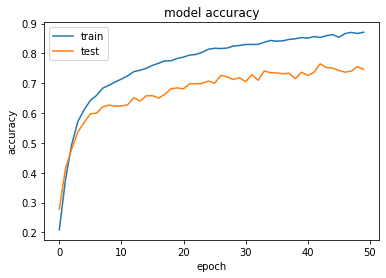

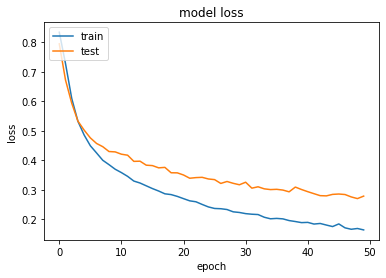

In [124]:
import matplotlib.pyplot as plt
plt.plot(history.history['macro_f1'])
plt.plot(history.history['val_macro_f1'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [125]:
# losses, val_losses, macro_f1s, val_macro_f1s = learning_curves(history)

In [126]:
def show_prediction(listPoke, model, display_output=False):
    acc = 0
    nbTypes = 0
    for name in listPoke:
        # Get each Pokemon's name and type from the generation 6 games
        pokeId = stats.loc[stats['Name']==name]['No'].iloc[0]
        types = stats.loc[stats['Name']==name]['Types'].iloc[0]
        img_path = os.path.join('sprites/sprites/pokemon/', str(pokeId)+'.png')
        # img_path = os.path.join('sprites/sprites/pokemon/versions/generation-iii/emerald/', str(pokeId)+'.png')

        # Read and prepare image
        img = image.load_img(img_path, target_size=(IMG_SIZE,IMG_SIZE,CHANNELS))
        if display_output:
            plt.imshow(img)
            plt.tight_layout()
            plt.show()
        img = image.img_to_array(img)
        img = img/255
        img = np.expand_dims(img, axis=0)

        # Generate prediction
        prediction = (model.predict(img) > 0.5).astype('int')
        prediction = pd.Series(prediction[0])
        prediction.index = mlb.classes_
        prediction = prediction[prediction==1].index.values
        
        nbTypes += len(types)

        if list(prediction):
            for type_predicted in list(prediction):
                if type_predicted in types:
                    acc+=1

        if display_output:
            print('\n\n{}\nType\n{}\n\nPrediction\n{}\n'.format(name, types, list(prediction)))

    print(f"Success : {acc}, overall : {nbTypes}")
    print(f"accuracy = {acc/nbTypes*100:.1f}%")

In [138]:
def alternate_show_prediction(listPoke, model, display_output=False):
    acc = 0
    nbTypes = 0
    for name in listPoke:
        # Get each Pokemon's name and type from the generation 6 games
        pokeId = stats.loc[stats['Name']==name]['No'].iloc[0]
        types = stats.loc[stats['Name']==name]['Types'].iloc[0]
        # img_path = os.path.join('sprites/sprites/pokemon/versions/generation-i/red-blue/', str(pokeId)+'.png')
        img_path = os.path.join('sprites/sprites/pokemon/versions/generation-viii/icons/', str(pokeId)+'.png')
        
        # Read and prepare image
        img = image.load_img(img_path, target_size=(IMG_SIZE,IMG_SIZE,CHANNELS))
        if display_output:
            plt.imshow(img)
            plt.tight_layout()
            plt.show()
        img = image.img_to_array(img)
        img = img/255
        img = np.expand_dims(img, axis=0)

        # Generate prediction
        prediction = (model.predict(img) > 0.5).astype('int')
        prediction = pd.Series(prediction[0])
        prediction.index = mlb.classes_
        prediction = prediction[prediction==1].index.values
        
        nbTypes += len(types)

        if list(prediction):
            for type_predicted in list(prediction):
                if type_predicted in types:
                    acc+=1

        if display_output:
            print('\n\n{}\nType\n{}\n\nPrediction\n{}\n'.format(name, types, list(prediction)))
    
    print(f"Success : {acc}, overall : {nbTypes}")
    print(f"accuracy = {acc/nbTypes*100:.1f}%")

In [139]:
# Pokemon = list(stats['Name'].iloc[:151].sample(10))

Pokemon = list(stats['Name'].iloc[:898])

# Pokemon = ["Inteleon",
        #   "Zamazenta",
        #   "Dracovish",
        #   "Toxtricity",
        #   "Flapple",
        #   "Orbeetle",
        #   "Hattrem",
        #   "Cufant"]
    

show_prediction(Pokemon, model, False)

Success : 79, overall : 1340
accuracy = 5.9%


In [133]:
gen_to_predict = 1
print("Generation " + str(gen_to_predict) + " predictions :")

show_prediction(list(stats['Name'].iloc[CodeGen[gen_to_predict-1]:CodeGen[gen_to_predict]]), model)

Generation 1 predictions :
Success : 37, overall : 218
accuracy = 17.0%
